In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import malaya

C:\Users\Analyst07\AppData\Roaming\Python\Python39\site-packages\malaya_boilerplate\frozen_graph.py:35: UserWarning: Cannot import beam_search_ops from Tensorflow Addons, ['malaya.jawi_rumi.deep_model', 'malaya.phoneme.deep_model', 'malaya.rumi_jawi.deep_model', 'malaya.stem.deep_model'] will not available to use, make sure Tensorflow Addons version >= 0.12.0
  warnings.warn(
C:\Users\Analyst07\AppData\Roaming\Python\Python39\site-packages\malaya_boilerplate\frozen_graph.py:38: UserWarning: check compatible Tensorflow version with Tensorflow Addons at https://github.com/tensorflow/addons/releases
  warnings.warn(


In [50]:
stopwords = pd.read_csv(r'C:\Users\Analyst07\Documents\Selenium\stopwords-ms.csv')
mask = np.array(Image.open(r"C:\Users\Analyst07\Documents\Selenium\tiktok.jpg"))

In [3]:
stop = []
for text in stopwords.stopwords:
    stop.append(text)

In [31]:
df1 = pd.read_csv(r'C:\Users\Analyst07\Documents\Selenium\nurul izzah\nurul izzah_@jason.yew_(13h ago )_(7194059149716507930).csv')
df2 = pd.read_csv(r'C:\Users\Analyst07\Documents\Selenium\nurul izzah\nurul izzah_@thaqibshaker_(14h ago )_(7194042940719664411).csv')
df = pd.concat([df1,df2])

In [15]:
len(df1)

499

In [16]:
len(df2)

575

In [5]:
model = malaya.sentiment.multinomial()

In [32]:
words1 = ''
for text in df1['comment']:
    words1 = words1 + ' ' + text
words1 = words1.lower()

words2 = ''
for text in df2['comment']:
    words2 = words2 + ' ' + text
words2 = words2.lower()

words = ''
for text in df['comment']:
    words = words + ' ' + text
words = words.lower()

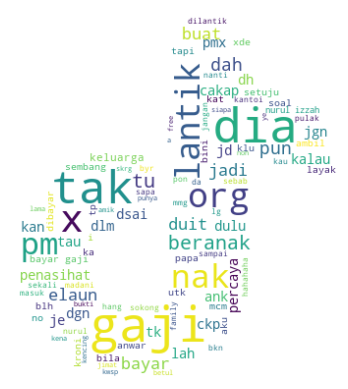

In [29]:
wordcloud = WordCloud(stopwords = stop, max_font_size=50, max_words=100, background_color="white",mask = mask).generate(words1)
ax = plt.gca()
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis('off')
ax.get_xaxis().set_visible(False)

<AxesSubplot: >

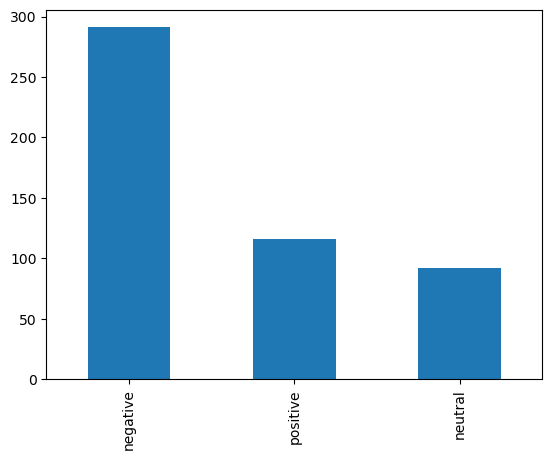

In [8]:
pd.DataFrame(pd.DataFrame(model.predict(list(df1.comment)))[0].value_counts())[0].plot(kind = 'bar')

In [22]:
df1['sentiment'] = model.predict(list(df1.comment))
df1.to_csv('sentiment.csv')

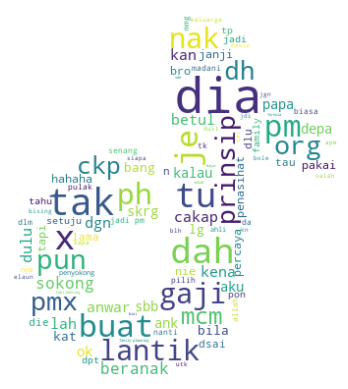

In [14]:
wordcloud = WordCloud(stopwords = stop, max_font_size=50, max_words=100, background_color="white",mask = mask).generate(words2)
fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis('off')
ax.get_xaxis().set_visible(False)

<AxesSubplot: >

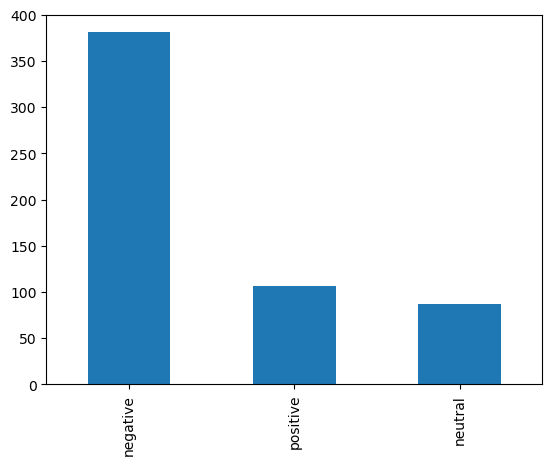

In [10]:
pd.DataFrame(pd.DataFrame(model.predict(list(df2.comment)))[0].value_counts())[0].plot(kind = 'bar')

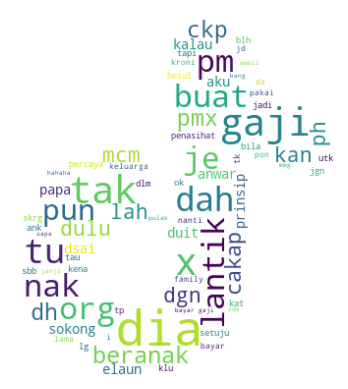

In [58]:
wordcloud = WordCloud(stopwords = stop, max_font_size=50, max_words=75, background_color="white",mask = mask).generate(words)
fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis('off')
ax.get_xaxis().set_visible(False)
fig.savefig(r'C:\Users\Analyst07\Documents\Selenium\nurul izzah\wordcloud_overall.png')

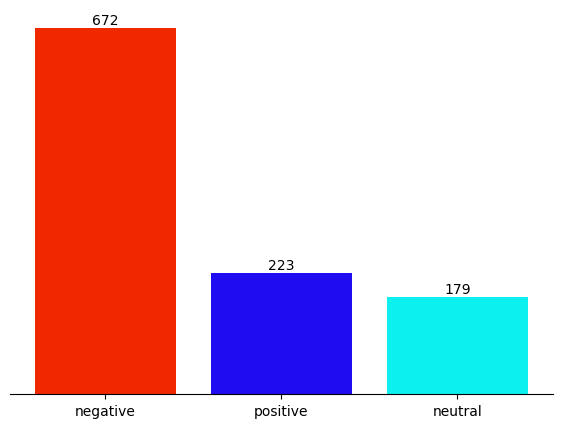

In [59]:
fig, ax = plt.subplots(figsize=(7,5))
p1 =  ax.bar(np.arange(3),pd.DataFrame(pd.DataFrame(model.predict(list(df.comment)))[0].value_counts())[0],color = ['#f02800', '#1f0cf0', '#0cf0f0'])
ax.bar_label(p1)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(labels=pd.DataFrame(pd.DataFrame(model.predict(list(df.comment)))[0].value_counts())[0].index)
ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.savefig(r'C:\Users\Analyst07\Documents\Selenium\nurul izzah\sentiment_overall.png')

In [44]:
pd.DataFrame(pd.DataFrame(model.predict(list(df.comment)))[0].value_counts())[0].index

Index(['negative', 'positive', 'neutral'], dtype='object')

In [51]:
stop

['abdul',
 'abdullah',
 'acara',
 'ada',
 'adalah',
 'ahmad',
 'air',
 'akan',
 'akhbar',
 'akhir',
 'aktiviti',
 'alam',
 'amat',
 'amerika',
 'anak',
 'anggota',
 'antara',
 'antarabangsa',
 'apa',
 'apabila',
 'april',
 'as',
 'asas',
 'asean',
 'asia',
 'asing',
 'atas',
 'atau',
 'australia',
 'awal',
 'awam',
 'bagaimanapun',
 'bagi',
 'bahagian',
 'bahan',
 'baharu',
 'bahawa',
 'baik',
 'bandar',
 'bank',
 'banyak',
 'barangan',
 'baru',
 'baru-baru',
 'bawah',
 'beberapa',
 'bekas',
 'beliau',
 'belum',
 'berada',
 'berakhir',
 'berbanding',
 'berdasarkan',
 'berharap',
 'berikutan',
 'berjaya',
 'berjumlah',
 'berkaitan',
 'berkata',
 'berkenaan',
 'berlaku',
 'bermula',
 'bernama',
 'bernilai',
 'bersama',
 'berubah',
 'besar',
 'bhd',
 'bidang',
 'bilion',
 'bn',
 'boleh',
 'bukan',
 'bulan',
 'bursa',
 'cadangan',
 'china',
 'dagangan',
 'dalam',
 'dan',
 'dana',
 'dapat',
 'dari',
 'daripada',
 'dasar',
 'datang',
 'datuk',
 'demikian',
 'dengan',
 'depan',
 'derivatives'

In [60]:
import pickle

In [62]:
pickle.dump(model, open(r'C:\Users\Analyst07\Documents\Selenium\model.sav', 'wb'))

TypeError: self.encoder cannot be converted to a Python object for pickling